In [2]:
import dlib
import glob
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dlib.__version__

'19.24.2'

In [6]:
import bz2


def unzip_bz2_file(zipped_file_name):
    zipfile = bz2.BZ2File(zipped_file_name)
    data = zipfile.read()
    newfilepath = output[:-4] #discard .bz2 extension
    open(newfilepath, 'wb').write(data)

In [7]:
if os.path.isfile('shape_predictor_5_face_landmarks.dat') != True:
    print("shape_predictor_5_face_landmarks.dat is going to be downloaded")

    output = "shape_predictor_5_face_landmarks.dat.bz2"
    
    unzip_bz2_file(output)

if os.path.isfile('dlib_face_recognition_resnet_model_v1.dat') != True:
    print("dlib_face_recognition_resnet_model_v1.dat is going to be downloaded")  
    
    output = "dlib_face_recognition_resnet_model_v1.dat.bz2"
    
    unzip_bz2_file(output)

shape_predictor_5_face_landmarks.dat is going to be downloaded
dlib_face_recognition_resnet_model_v1.dat is going to be downloaded


# Load models

In [8]:
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor("shape_predictor_5_face_landmarks.dat")
facerec = dlib.face_recognition_model_v1("dlib_face_recognition_resnet_model_v1.dat")

In [9]:
def plotPairs(img1, img2):
    fig = plt.figure()

    ax1 = fig.add_subplot(1,2,1)
    plt.imshow(img1)
    plt.axis('off')

    ax1 = fig.add_subplot(1,2,2)
    plt.imshow(img2)
    plt.axis('off')

    plt.show()

In [10]:
threshold = 0.6 #distance threshold declared in dlib docs for 99.38% confidence score on LFW data set

def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [11]:
def verify(img1_path, img2_path):
    img1 = dlib.load_rgb_image(img1_path)
    img2 = dlib.load_rgb_image(img2_path)
    
    """
    print("Raw images: ")
    plotPairs(img1, img2)
    """
    
    #------------------------------------
    #face detection and alignment
    
    img1_detection = detector(img1, 1)
    img2_detection = detector(img2, 1)
    
    if len(img1_detection) == 0:
        raise ValueError("no face detected in img1")

    if len(img2_detection) == 0:
        raise ValueError("no face detected in img2")
    
    img1_shape = sp(img1, img1_detection[0])
    img2_shape = sp(img2, img2_detection[0])
    
    img1_aligned = dlib.get_face_chip(img1, img1_shape)
    img2_aligned = dlib.get_face_chip(img2, img2_shape)
    
    print("Deteted and aligned faces:")
    plotPairs(img1_aligned, img2_aligned)
    
    #-----------------------------------
    #representation
    
    img1_representation = facerec.compute_face_descriptor(img1_aligned)
    img2_representation = facerec.compute_face_descriptor(img2_aligned)
    
    img1_representation = np.array(img1_representation)
    img2_representation = np.array(img2_representation)
    
    #-----------------------------------
    #verification
    
    distance = findEuclideanDistance(img1_representation, img2_representation)
    
    print("Distance is ", distance," whereas threshold is ", threshold)
    
    if distance < 0.6: 
        print(img1_path," and ",img2_path," are same person")
        verified = True
    else:
        print(img1_path," and ",img2_path," are different person")
        verified = False
    
    return verified

Deteted and aligned faces:


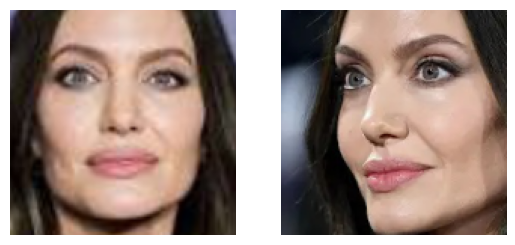

Distance is  0.4069470020647151  whereas threshold is  0.6
dataset/img1.jpg  and  dataset/img2.jpg  are same person


True

In [12]:
verify("dataset/img1.jpg", "dataset/img2.jpg")